In [1]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from scipy.stats import kstest, ks_2samp, pearsonr
import seaborn as sns
import os
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix

def plot_feature_stationary(feature_name, lw=3, figsize = (15, 10)):
    plt.figure(figsize = figsize)
    plt.plot(d_stationary[feature_name], linewidth = lw, color = "darkorange")
    anomaly_indices=np.argwhere(y_cat[:,0] == 1)[:,0]
    lb = np.min(d_stationary[feature_name])-0.1
    ub = np.abs(lb) + np.max(d_stationary[feature_name])+0.1
    plt.bar(x=anomaly_indices, height=ub, bottom = lb)
    plt.show()

def plot_feature(feature_name, lw=3, figsize = (15, 10)):
    plt.figure(figsize = figsize)
    plt.plot(d[feature_name], linewidth = lw, color = "darkorange")
    anomaly_indices=np.argwhere(y_cat[:,0] == 1)[:,0]
    lb = np.min(d[feature_name])-0.1
    ub = np.abs(lb) + np.max(d[feature_name])+0.1
    plt.bar(x=anomaly_indices, height=ub, bottom = lb)
    plt.show()

In [2]:
mat = scipy.io.loadmat('EWS.mat')
names = list(mat.keys())[3:-2]
y = mat["Y"]
y_cat = np.zeros_like(y, dtype = int)
y_cat[y[:,0]==1.0,0] = 1
col = []
times = np.arange(y.shape[0])
for ipsilon in y:
    if ipsilon == 1.0:
        col.append("red")
    else:
        col.append("blue")
d = {}
for i, name in enumerate(names):
    if name != "None":
        d[name] = mat[names[i]]


In [3]:
Indices_Currencies = ["XAUBGNL", "BDIY", "CRY", "Cl1", "DXY", "EMUSTRUU", "GBP", "JPY", "LF94TRUU", "LF98TRUU", "LG30TRUU", "LMBITR", "LP01TREU", "LUACTRUU", "LUMSTRUU", "MXBR", "MXCN", "MXEU", "MXIN", "MXJP", "MXRU", "MXUS", "VIX"]

InterestRates = ["EONIA", "GTDEM10Y", "GTDEM2Y", "GTDEM30Y", "GTGBP20Y", "GTGBP2Y", "GTGBP30Y", "GTITL10YR", "GTITL2YR", "GTITL30YR", "GTJPY10YR", "GTJPY2YR", "GTJPY30YR", "US0001M", "USGG3M", "USGG2YR", "GT10", "USGG30YR"]

response_cat = y_cat[1:, 0]
response = y[1:, 0]

d_stationary = {}
for feature_name in list(d.keys()):
    if feature_name in Indices_Currencies:
        temp = np.log(d[feature_name])
        d_stationary[feature_name] = temp[1:] - temp[:-1]
        d_stationary[feature_name] = d_stationary[feature_name].reshape(-1,)
        # d_stationary[feature_name] = np.log(d[feature_name][1:] / d[feature_name][1:])
    elif feature_name == "ECSURPUS":
        d_stationary[feature_name] = d[feature_name][1:]
        d_stationary[feature_name] = d_stationary[feature_name].reshape(-1,)
    elif feature_name in InterestRates:
        d_stationary[feature_name] = d[feature_name][1:] - d[feature_name][:-1]
        d_stationary[feature_name] = d_stationary[feature_name].reshape(-1,)


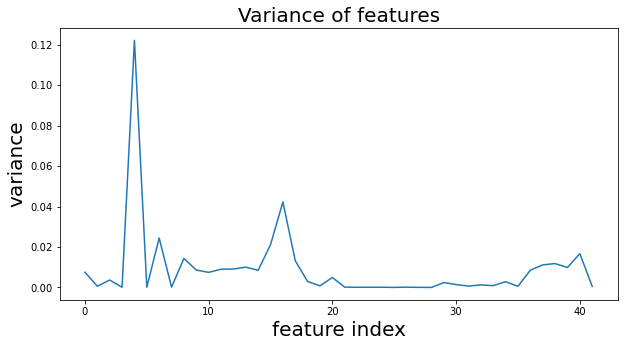

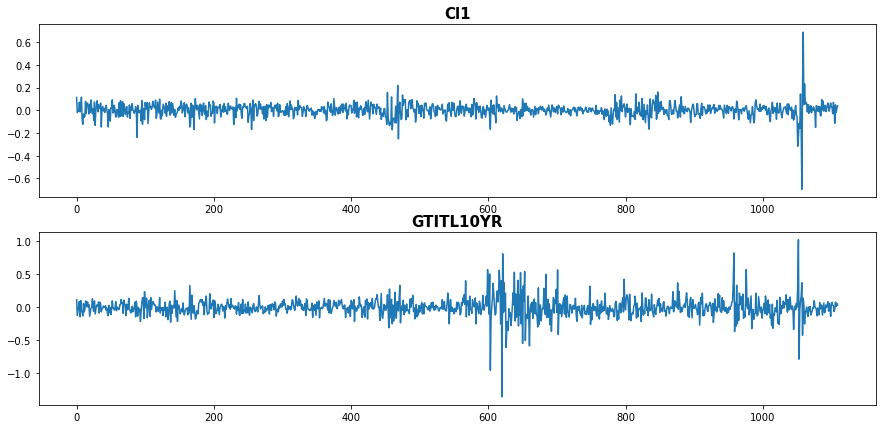

In [4]:
variances = []
for column in d_stationary.keys():
    variances.append(np.var(d_stationary[column]))

plt.figure(figsize = (10,5))
plt.plot(variances)
plt.title("Variance of features", fontsize=20)
plt.xlabel("feature index", fontsize=20)
plt.ylabel("variance", fontsize=20)
plt.savefig('plots' + os.sep + 'variance')

variances = np.array(variances).reshape(-1,)
small_variance_index = np.argwhere(variances <= 0.01)
small_variance_index = small_variance_index.ravel()

fig, axs = plt.subplots(2, 1, figsize = (15,7))
count = 0
plot_list = np.array([2, 15]).reshape(-1,)
for j in range(2):
    plot_nome = list(d_stationary.keys())[plot_list[count]]
    axs[j].plot(d_stationary[plot_nome])
    axs[j].set_title(plot_nome, fontsize=15, loc = "center", fontweight = 1000)
    count += 1
fig.savefig('plots' + os.sep + 'small_variance_plot')

Augmented dickey fuller test for stationarity and Komogorov Smirnov test for equality in distribution 

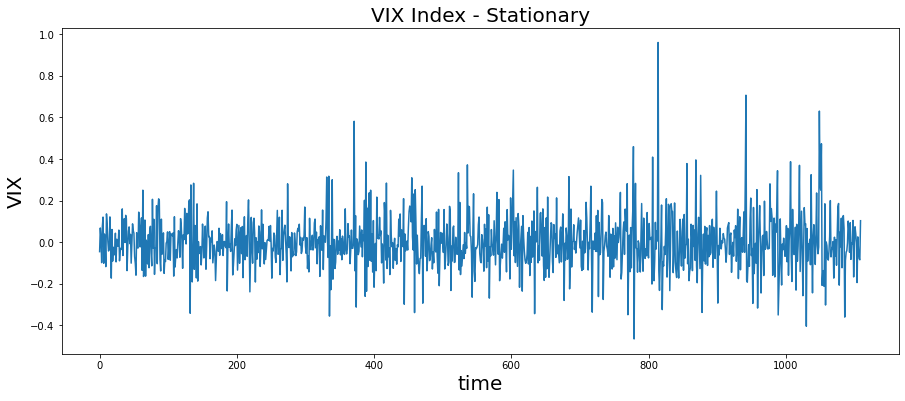

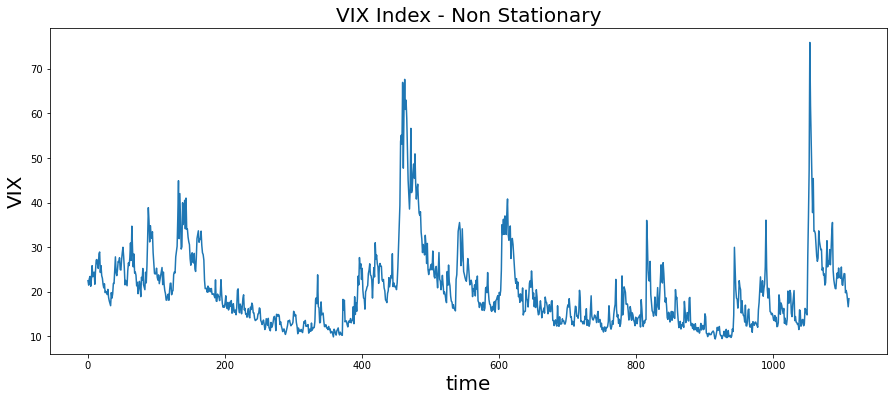

In [5]:
plt.figure(figsize = (15, 6))
plt.plot(d_stationary["VIX"])
plt.xlabel("time", fontsize=20)
plt.ylabel("VIX", fontsize=20)
plt.title("VIX Index - Stationary", fontsize=20)

# plt.show()
plt.savefig('plots' + os.sep + 'stationary_VIX')

plt.figure(figsize = (15, 6))
plt.plot(d["VIX"])
plt.xlabel("time", fontsize=20)
plt.ylabel("VIX", fontsize=20)
plt.title("VIX Index - Non Stationary", fontsize=20)

# plt.show()
plt.savefig('plots' + os.sep + 'non_stationary_VIX')

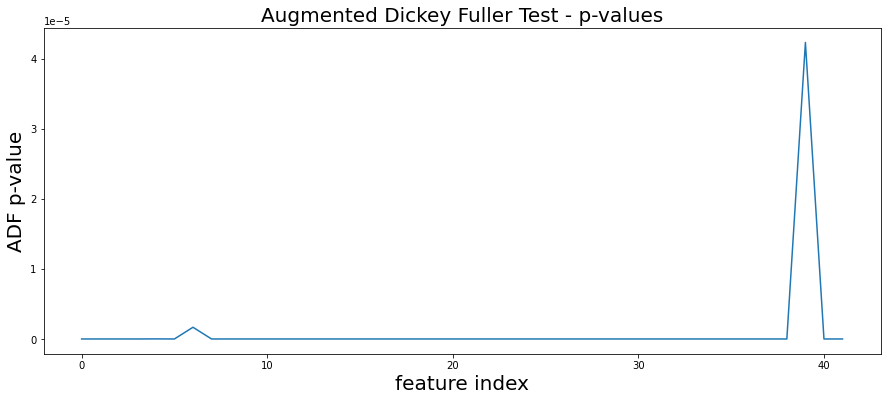

In [6]:
adf_pvalues = {}
for feature_name in list(d_stationary.keys()):
    temp = adfuller(list(d_stationary[feature_name]))
    adf_pvalues[feature_name] = temp[1]
    
# chech if stationarity has been obtained
plt.figure(figsize = (15, 6))
plt.plot(list(adf_pvalues.values()))
plt.ylabel("ADF p-value", fontsize=20)
plt.xlabel("feature index", fontsize=20)
plt.title("Augmented Dickey Fuller Test - p-values", fontsize=20)
# plt.show()
plt.savefig('plots' + os.sep + 'adf_pvalues')

Names of features with high p-value: [['GTITL10YR']
 ['GTITL30YR']
 ['GTJPY2YR']
 ['GTJPY30YR']
 ['JPY']
 ['LF94TRUU']
 ['LUACTRUU']
 ['XAUBGNL']]


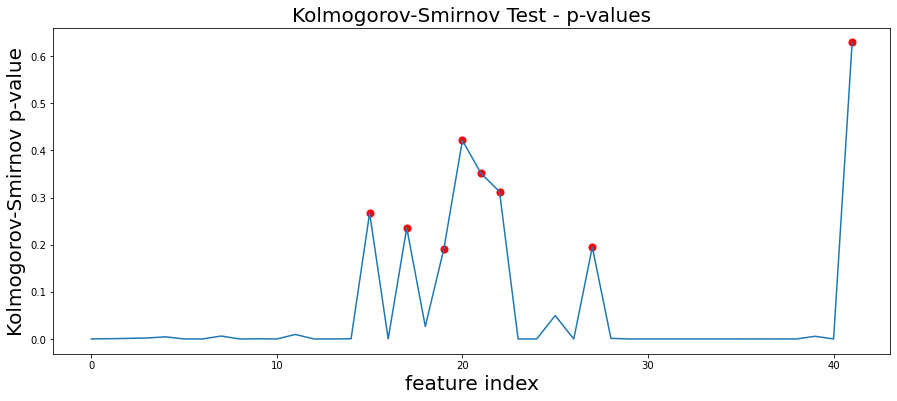

In [7]:
ks_pvalues = {}
for feature_name in list(d_stationary.keys()):
    datum = d_stationary[feature_name]
    # list(np.argwhere(y_cat[:,0] == 0).reshape(-1,))
    datum_0 = datum[np.argwhere(y_cat[1:,0] == 0)].reshape(-1,)
    datum_1 = datum[np.argwhere(y_cat[1:,0] == 1)].reshape(-1,)
    temp = ks_2samp(datum_0, datum_1)
    ks_pvalues[feature_name] = temp[1]


plt.figure(figsize = (15, 6))
names_array = np.array(list(ks_pvalues.keys()))
ks_pvalues = np.array(list((ks_pvalues.values())))
plt.plot(ks_pvalues)
high_pval = np.argwhere(np.array(ks_pvalues) > 0.05)
plt.scatter(high_pval.ravel(), ks_pvalues[high_pval.ravel()], c = "red", s = 50)
plt.ylabel("Kolmogorov-Smirnov p-value", fontsize=20)
plt.xlabel("feature index", fontsize=20)
plt.title("Kolmogorov-Smirnov Test - p-values", fontsize=20)
# plt.show()
plt.savefig('plots' + os.sep + 'ks_pvalues')

print("Names of features with high p-value:", names_array[high_pval])

plottando il valore dell'oro stazionario sembra che sia importante solo all'inizissimo di un periodo blu, ma il range non è molto diverso nel tempo

ora togliamo:
```
                     array([['GTITL10YR'],
                            ['GTITL30YR'],
                            ['GTJPY2YR'],
                            ['GTJPY30YR'],
                            ['JPY'],
                            ['LF94TRUU'],
                            ['LUACTRUU'],
                            ['XAUBGNL']], dtype='<U9')
```
e inoltre togliamo gli indici che risultano più correlati tra di loro

In [8]:
# plot_feature_stationary("VIX", lw=3)
# plot_feature("VIX", lw=3)

vediamo quali feature sono correlate

<AxesSubplot:>

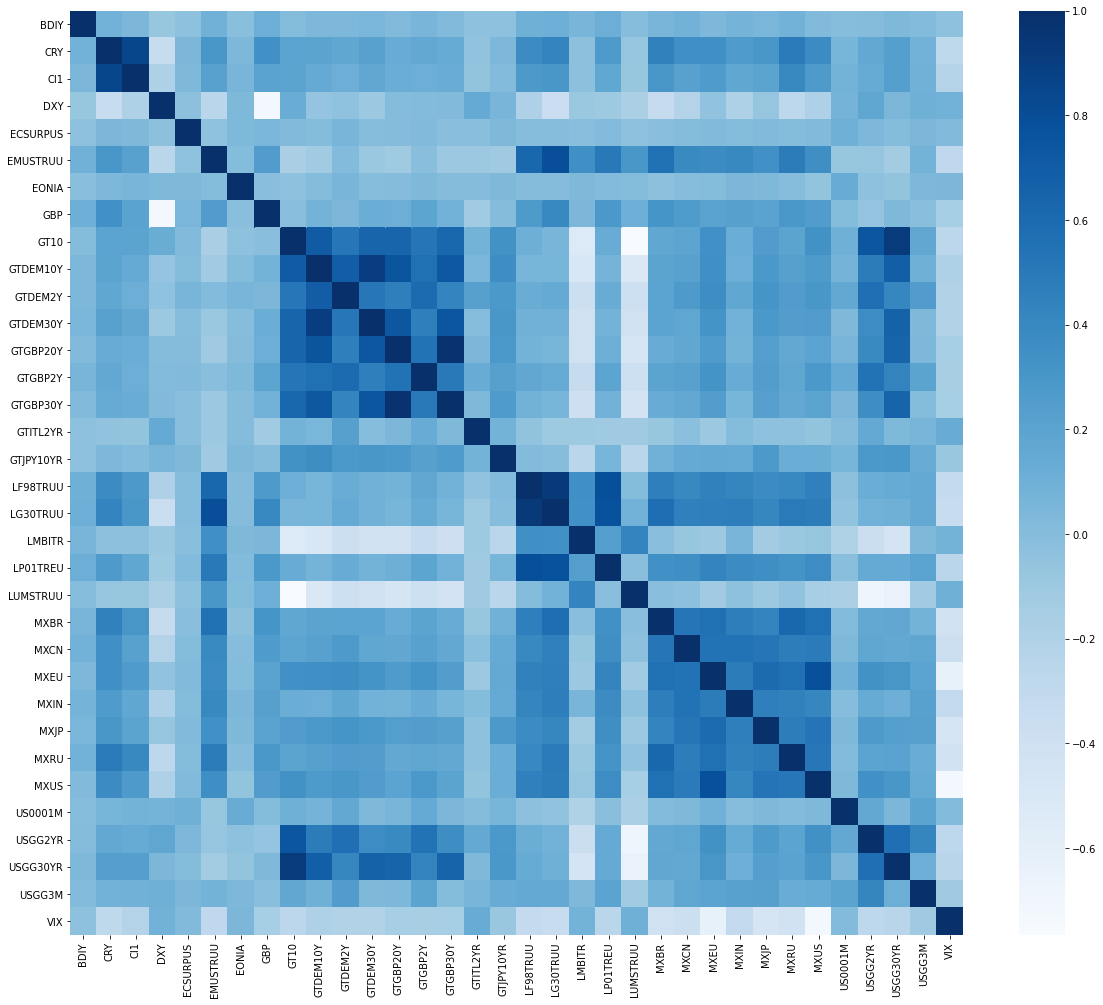

In [9]:
df = pd.DataFrame(d_stationary)
df_1 = df.drop(df.columns[list(high_pval[:,0])], axis=1)
corr_matrix = df_1.corr()
fig, ax = plt.subplots(figsize=(20,17))  
sns.heatmap(corr_matrix, 
        xticklabels=corr_matrix.columns,
        yticklabels=corr_matrix.columns,
        cmap = "Blues")

In [10]:
df_3 = df_1.copy()

look at corelation che ci sembrano essere correlate

In [11]:
df_1.columns

Index(['BDIY', 'CRY', 'Cl1', 'DXY', 'ECSURPUS', 'EMUSTRUU', 'EONIA', 'GBP',
       'GT10', 'GTDEM10Y', 'GTDEM2Y', 'GTDEM30Y', 'GTGBP20Y', 'GTGBP2Y',
       'GTGBP30Y', 'GTITL2YR', 'GTJPY10YR', 'LF98TRUU', 'LG30TRUU', 'LMBITR',
       'LP01TREU', 'LUMSTRUU', 'MXBR', 'MXCN', 'MXEU', 'MXIN', 'MXJP', 'MXRU',
       'MXUS', 'US0001M', 'USGG2YR', 'USGG30YR', 'USGG3M', 'VIX'],
      dtype='object')

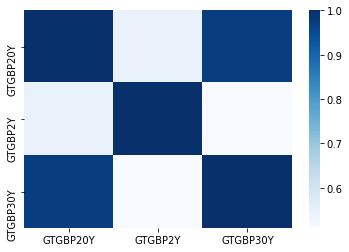

In [12]:
british_bonds = ['GTGBP20Y', 'GTGBP2Y','GTGBP30Y']
corr_matrix = df_1.loc[:,british_bonds].corr()
# fig, ax = plt.subplots(figsize=(20,17))  
sns.heatmap(corr_matrix, 
        xticklabels=corr_matrix.columns,
        yticklabels=corr_matrix.columns,
        cmap = "Blues")
# teniamo solo 2 anni
df_1 = df_1.drop(['GTGBP20Y','GTGBP30Y'], axis=1)

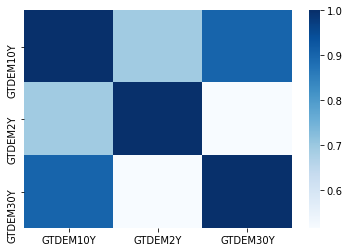

In [13]:
german_bonds = ['GTDEM10Y', 'GTDEM2Y', 'GTDEM30Y']
corr_matrix = df_1.loc[:,german_bonds].corr()
# fig, ax = plt.subplots(figsize=(20,17))  
sns.heatmap(corr_matrix, 
        xticklabels=corr_matrix.columns,
        yticklabels=corr_matrix.columns,
        cmap = "Blues")
# teniamo solo 2 anni
df_1 = df_1.drop(['GTDEM10Y','GTDEM30Y'], axis=1)

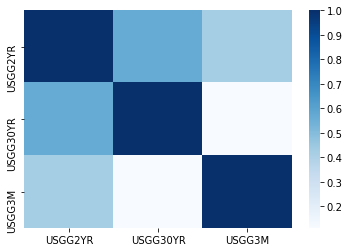

In [14]:
us_bonds = ['USGG2YR', 'USGG30YR', 'USGG3M']
corr_matrix = df_1.loc[:,us_bonds].corr()
# fig, ax = plt.subplots(figsize=(20,17))  
sns.heatmap(corr_matrix, 
        xticklabels=corr_matrix.columns,
        yticklabels=corr_matrix.columns,
        cmap = "Blues")
# teniamo solo 2 anni e 3 mesi
df_1 = df_1.drop(['USGG30YR'], axis=1)

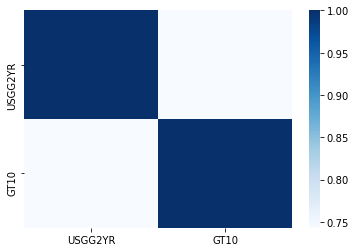

In [15]:
us_bonds = ['USGG2YR', 'GT10']
corr_matrix = df_1.loc[:,us_bonds].corr()
# fig, ax = plt.subplots(figsize=(20,17))  
sns.heatmap(corr_matrix, 
        xticklabels=corr_matrix.columns,
        yticklabels=corr_matrix.columns,
        cmap = "Blues")
# teniamo 2 anni
df_1 = df_1.drop(['GT10'], axis=1)

In [16]:
df_1 = df_1.drop(['Cl1', "LG30TRUU", "LF98TRUU", "LP01TREU", "LMBITR"], axis=1)

<AxesSubplot:>

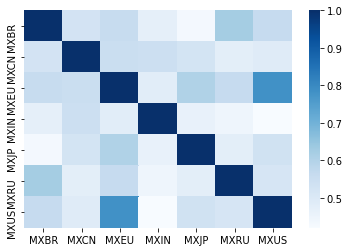

In [17]:
market_indices = ["MXBR", "MXCN", "MXEU", "MXIN", "MXJP", "MXRU", "MXUS"]
corr_matrix = df_1.loc[:,market_indices].corr()
# fig, ax = plt.subplots(figsize=(20,17))  
sns.heatmap(corr_matrix, 
        xticklabels=corr_matrix.columns,
        yticklabels=corr_matrix.columns,
        cmap = "Blues")
# we keep them all

<AxesSubplot:>

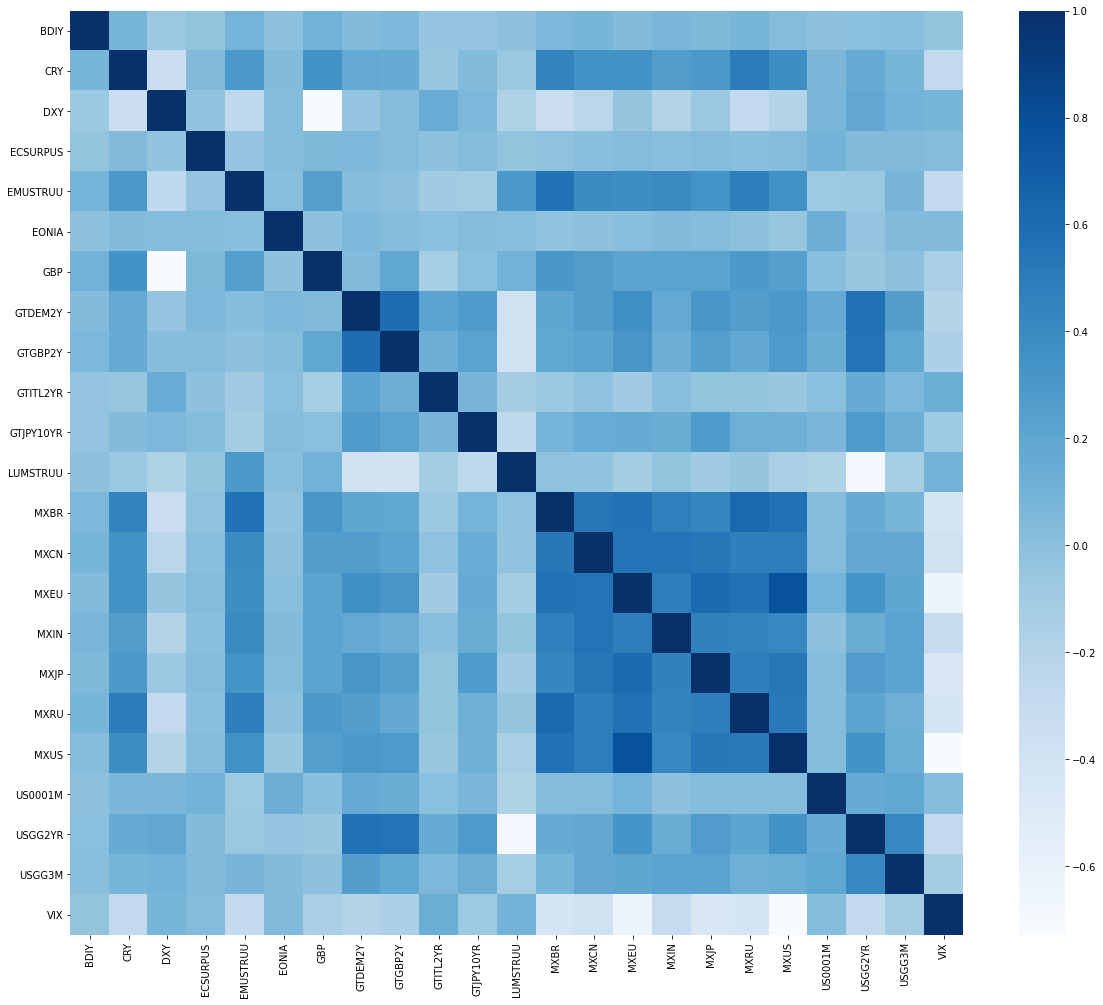

In [18]:
corr_matrix = df_1.corr()
fig, ax = plt.subplots(figsize=(20,17))  
sns.heatmap(corr_matrix, 
        xticklabels=corr_matrix.columns,
        yticklabels=corr_matrix.columns,
        cmap = "Blues")

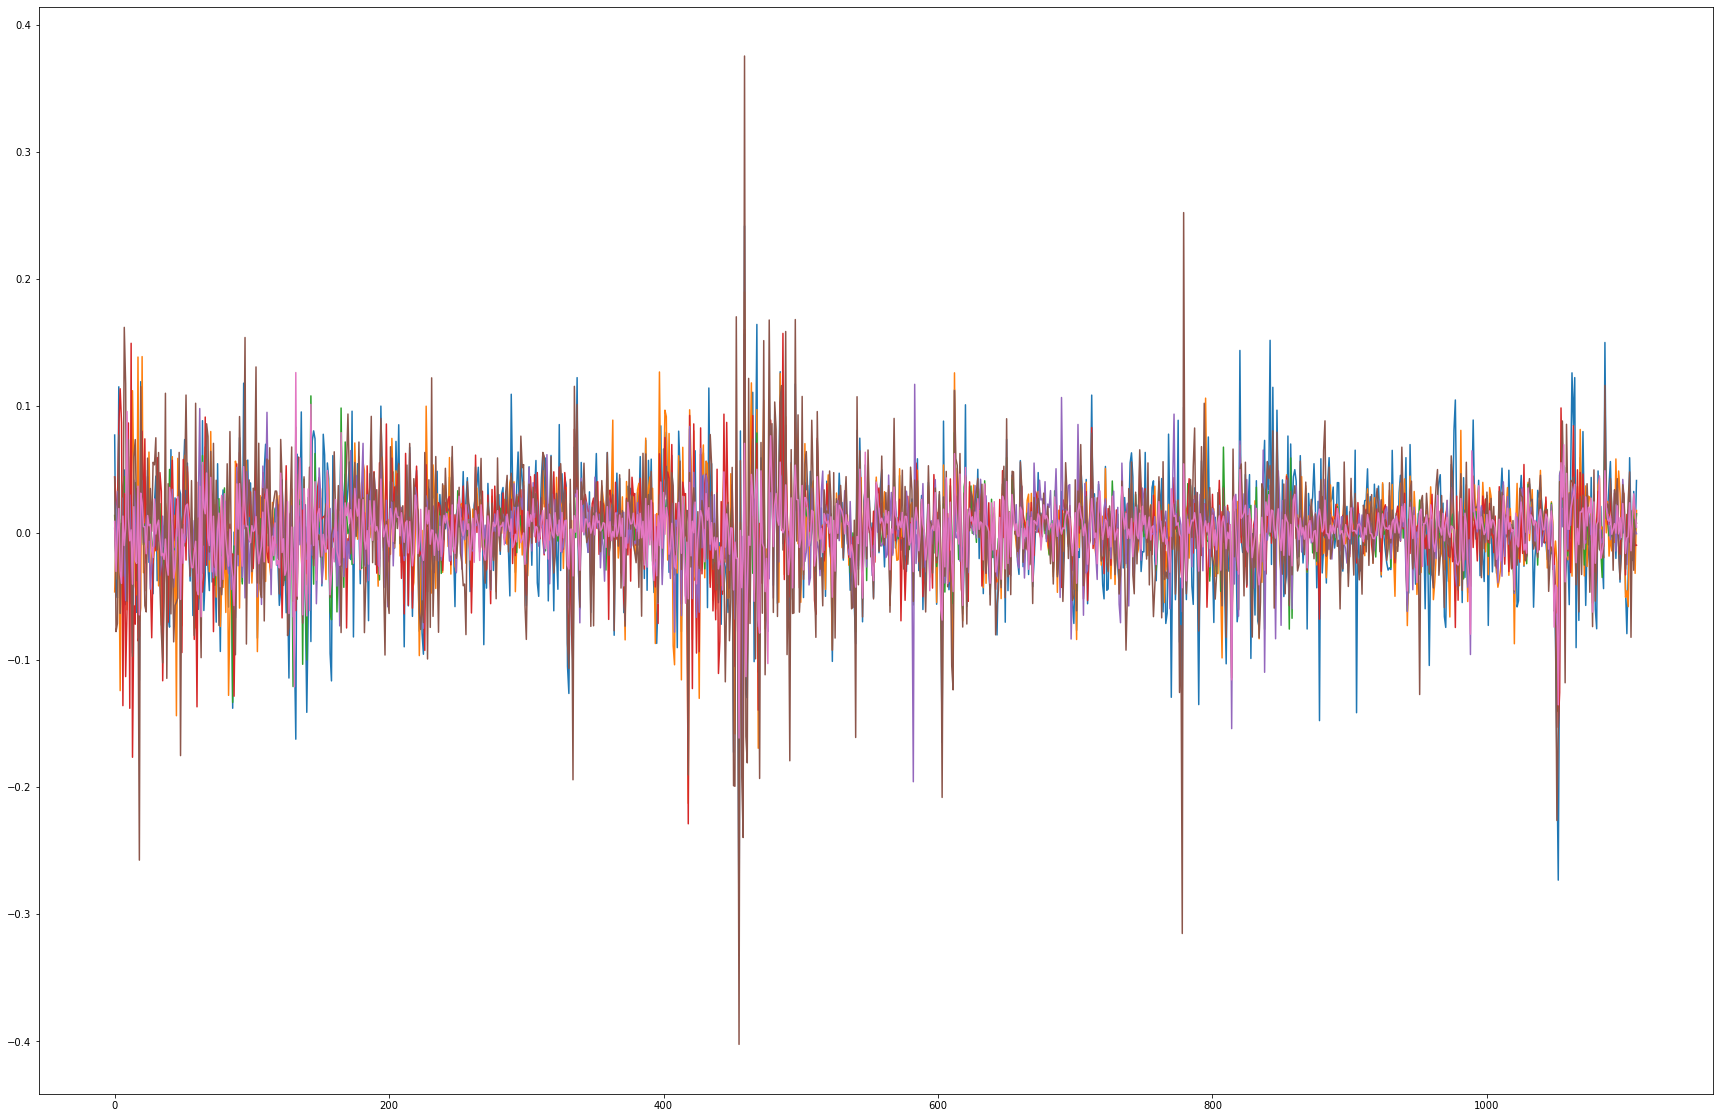

In [19]:
plt.figure(figsize = (30,20))
plt.plot(df_1.loc[:,market_indices])
plt.show()

we choose to focus on US and EU

In [20]:
df_1 = df_1.drop(["MXCN","MXIN", "MXJP", "MXRU"], axis=1)

In [21]:
df_1 = df_1.drop(["GTJPY10YR"], axis=1)

In [22]:
df_1 = df_1.drop(["US0001M"], axis=1)

In [23]:
df_1 = df_1.drop(["GBP"], axis=1)

In [24]:
print(len(df_1.columns))
df_1.columns

16


Index(['BDIY', 'CRY', 'DXY', 'ECSURPUS', 'EMUSTRUU', 'EONIA', 'GTDEM2Y',
       'GTGBP2Y', 'GTITL2YR', 'LUMSTRUU', 'MXBR', 'MXEU', 'MXUS', 'USGG2YR',
       'USGG3M', 'VIX'],
      dtype='object')

In [25]:
df_1 = df_1.drop(["EMUSTRUU", "LUMSTRUU", "USGG3M", "DXY", "GTITL2YR", "ECSURPUS"], axis=1)

<AxesSubplot:>

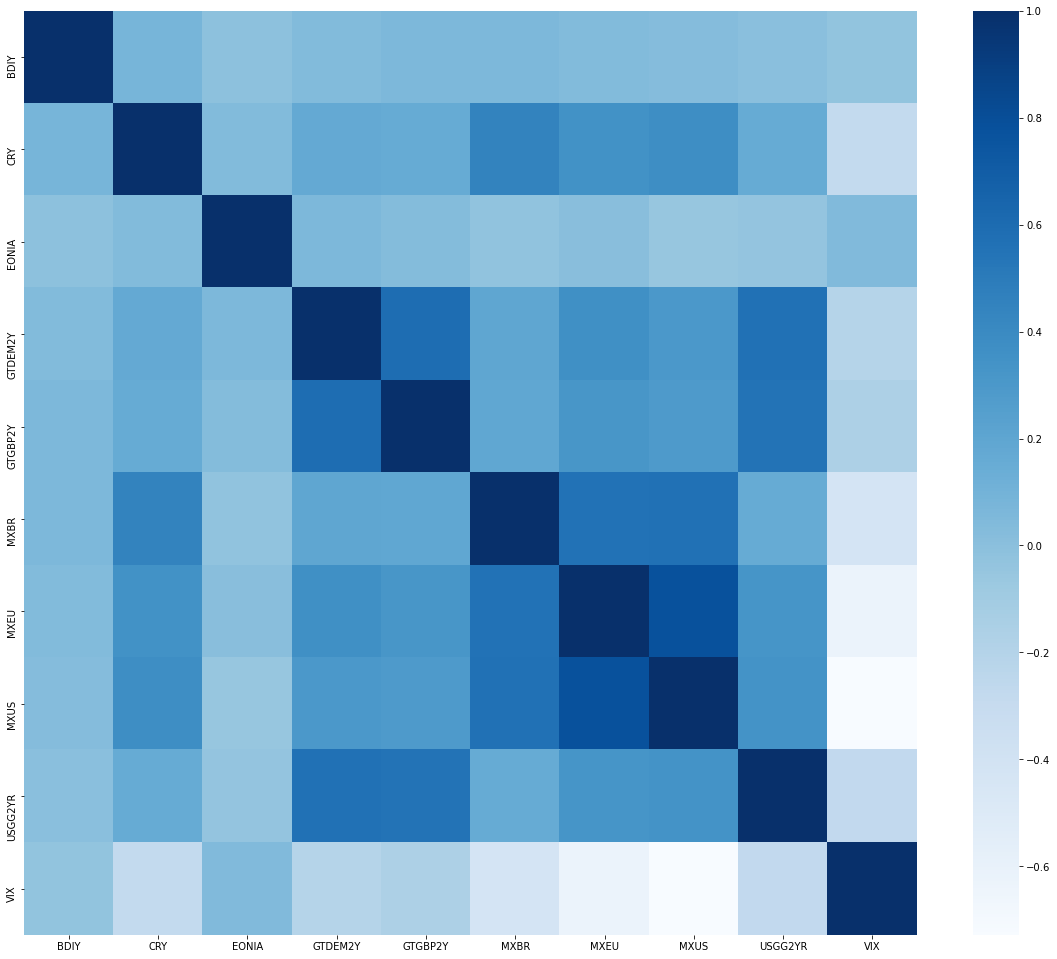

In [26]:
corr_matrix = df_1.corr()
fig, ax = plt.subplots(figsize=(20,17))  
sns.heatmap(corr_matrix, 
        xticklabels=corr_matrix.columns,
        yticklabels=corr_matrix.columns,
        cmap = "Blues")

In [27]:
print(sum(y_cat), y_cat.shape[0]-sum(y_cat))
print(sum(y_cat)/y_cat.shape[0]*100, 1-sum(y_cat)/y_cat.shape[0])

[237] [874]
[21.33213321] [0.78667867]


In [28]:
# fig, ax = plt.subplots(4, 4, figsize = (20, 15))
# fig.suptitle('Reduced Dataset')
# count = 0
# for i in range(4):
#     for j in range(4):
#         ax[i, j].plot(df_1.iloc[:,count].values, linewidth = 1, color = "darkorange")
#         anomaly_indices=np.argwhere(y_cat[1:,0] == 1)[:,0]
#         lb = np.min(df_1.iloc[:,count].values)-0.1
#         ub = np.abs(lb) + np.max(df_1.iloc[:,count].values)+0.1
#         ax[i, j].bar(x=anomaly_indices, height=ub, bottom = lb)
#         ax[i, j].set_title(df_1.columns[count])
#         count += 1

In [29]:
for uno in df_1.columns:
    print(np.min(df_1[uno]), np.max(df_1[uno]))

-0.4794940948486328 0.5420408248901367
-0.1701818237883046 0.13335751931303097
-1.1100000000000003 0.9800000000000004
-0.4249999999999998 0.4089999999999998
-0.4678 0.7067000000000001
-0.3328642318731614 0.24147935987310643
-0.14081705073293715 0.1563911435218568
-0.16158414150971367 0.12605881454970103
-0.5699999999999998 0.5221999999999998
-0.4653475361779704 0.9601306479425995


In [30]:
len(df_1.columns)

10

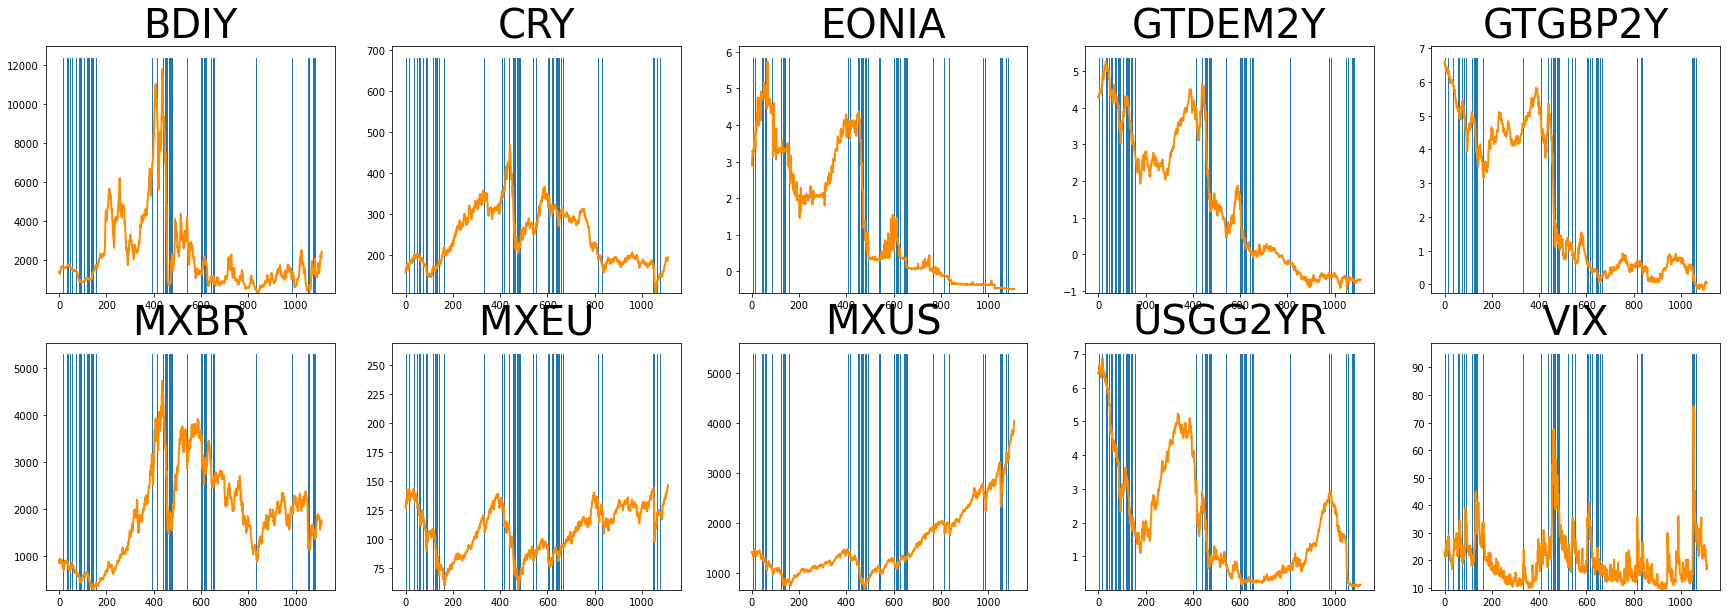

In [31]:
fig, axs = plt.subplots(2, 5, figsize = (30,10))
count = 0
for i in range(2):
    for j in range(5):
        feature_name_2 = df_1.columns[count]
        axs[i,j].plot(d[feature_name_2], linewidth = 2, color = "darkorange")
        anomaly_indices=np.argwhere(y_cat[:,0] == 1)[:,0]
        lb = np.min(d[feature_name_2])-0.1
        ub = np.abs(lb) + np.max(d[feature_name_2])+0.1
        axs[i,j].bar(x=anomaly_indices, height=ub, bottom = lb)
        axs[i,j].set_title(feature_name_2, fontsize=40)
        count += 1
fig.savefig('plots' + os.sep + 'final_dataset')

# Instead of looking at the correlation, we reduce the dimensionality based in different criteria

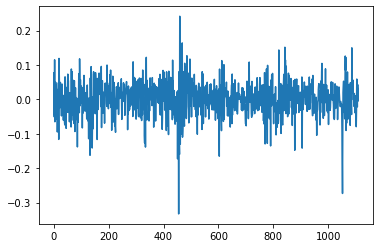

In [119]:
plt.plot(df_1["MXBR"])

# Try some classification algorithms

In [148]:
# from sklearn.neighbors import KernelDensity
# y_cat_new = y_cat[1:,0]
# anomalies = df_1.values[y_cat_new==1,:]
# kd_model = KernelDensity(kernel = "tophat", bandwidth = 1)
# # kd_model = KernelDensity(kernel = "gaussian", bandwidth = 0.5)
# kd_model.fit(anomalies)
# random_samples = kd_model.sample(n_samples=50)
# # print(random_samples)
# print(random_samples.shape)
# print(random_samples[:5,:])

from imblearn.over_sampling import SMOTE

ModuleNotFoundError: No module named 'imblearn'

In [147]:
from sklearn.neighbors import KNeighborsClassifier
import random

df_2 = df_1.copy()
X = df_2.values
y = y_cat[1:,:].reshape(-1,1)
X = np.concatenate((X, random_samples), axis = 0)
y = np.concatenate((y, np.ones((random_samples.shape[0],1))), axis = 0)


test_size = int(0.1*X.shape[0])
exclude = np.random.choice(X.shape[0], test_size, replace=False)
mask = np.ones(X.shape[0], bool)
mask[exclude] = False
X_train = X[mask == True]
y_train = y[mask == True]
X_test = X[mask == False]
y_test = y[mask == False]

model = KNeighborsClassifier(n_neighbors=5)

# # # Train the model using the training sets
model.fit(X_train,y_train)

# # #Predict Output
predicted= model.predict(X_test) # 0:Overcast, 2:Mild
# print(predicted)
C = confusion_matrix(y_test,predicted)
print("tn fn, \nfp tp")
print(C)

recall = C[1,1]/(C[1,1] + C[0,1])
print("recall:", recall)

tn fn, 
fp tp
[[84  1]
 [22  9]]
recall: 0.9


c:\Users\Michele\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


# Isolation Forest

In [58]:
# test_size = int(0.2*df_1.values.shape[0])
# exclude = np.random.choice(df_1.values.shape[0], test_size, replace=False)
# mask = np.ones(df_1.values.shape[0], bool)
# mask[exclude] = False
# y_cat_new = y_cat[1:,0]
# X_train = pd.DataFrame(d_stationary).values[mask == True]
# y_train = y_cat_new[mask == True]
# X_test = pd.DataFrame(d_stationary).values[mask == False]
# y_test = y_cat_new[mask == False]

# # X_train = X_train.reshape(-1,1)
# # X_test = X_test.reshape(-1,1)
# # fit the Forest
# # clf = IsolationForest(max_samples=200, contamination=0.1, random_state=rng)
# clf = IsolationForest(contamination=0.2, n_estimators = 1000)
# clf.fit(X_train)
# y_pred_train = clf.predict(X_train)
# y_pred_test = clf.predict(X_test)

# y_pred_test[y_pred_test == -1] = 1
# print(np.sum(y_pred_test), y_pred_test.shape[0] - np.sum(y_pred_test))
# C = confusion_matrix(y_test,y_pred_test)
# print("tn fn, \nfp tp")
# print(C)
# print("anomalies in the test set:",sum(y_test))
# print("normal points in the test set:",y_test.shape[0]-sum(y_test))
# print("anomalies predicted (test set):",sum(y_pred_test))
# print("normal points (test set):",y_pred_test.shape[0]-sum(y_pred_test))

# y_pred_train[y_pred_train == -1] = 1
# print(np.sum(y_pred_train), y_pred_train.shape[0] - np.sum(y_pred_train))
# C = confusion_matrix(y_train,y_pred_train)
# print("tn fn, \nfp tp")
# print(C)
# print("anomalies in the test set:",sum(y_train))
# print("normal points in the test set:",y_train.shape[0]-sum(y_train))
# print("anomalies predicted (test set):",sum(y_pred_train))
# print("normal points (test set):",y_pred_train.shape[0]-sum(y_pred_train))
